## Monte Carlo Simulations

The bahaviour of many physical systems is determined by -- often microscopical -- random process. Finding analytical solution to such problems is often not possible. Tracing them with standard intergration methods can become untracktable, as every single random variate adds an extra dimension to the problem. One can therefore resort to approximately simulation the macroscopic properties by a finite random draw of microscopic constituents.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rng = np.random.default_rng() 

N_homework = 17

ii = rng.integers(N_homework)+1

print(ii)

10


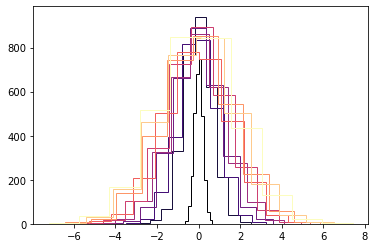

In [3]:
# example 1: 1d brownian motion
# brownian motion is a random walk whose increments are drawn from a Gaussian.

Ntime = 100
Nparticles = 3000

start = np.zeros((Nparticles, ))

rng = np.random.default_rng()

sigma = 0.2

increments = sigma*rng.normal(size=(Nparticles, Ntime))

position = start[:, None]+np.cumsum(increments, axis=1)

thin = 10
plt.figure()

colors = plt.cm.magma(np.linspace(0, 1, Ntime//thin))
for i in range(Ntime//thin):
    _ = plt.hist(position[:, thin*i], histtype='step', color=colors[i])

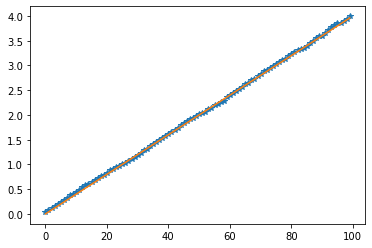

In [4]:
variance = np.var(position, axis=0)

t = np.arange(Ntime)
plt.plot(t, variance, '*')
plt.plot(t, sigma**2*t)


# it was a major finding from Albert Einstein, as it demonstrated that Brownian motion could
# describe the effect of diffusion on a gas density.
# in final consequence, this means that diffusion is the result of the microscopic particles.
# this was the final victory for the Atomist model, against the last proponents that matter was continuous!!

In [5]:
# example 1.b: 1d brownian motion and x>0

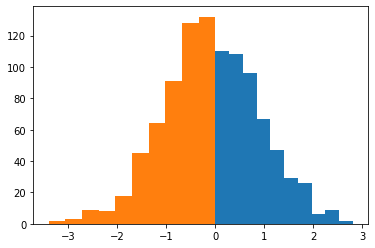

In [6]:
# this is slightly harder, as we need to draw from a truncated 
# normal distribution. 
from scipy.stats import truncnorm
_ = plt.hist(truncnorm.rvs(0, np.inf, size=500))
_ = plt.hist(truncnorm.rvs(-np.inf, 0, size=500))

In [7]:
# in each time step i, the particle is at xi, the truncation will change x>0 will change to delta x_i > -x_i

Ntime = 200
Nparticle = 3000

mu = -0.2  # this is a constant displacement down. 
# Physically in a timestep dt a constant displacement
# is indicative of very strong internal friction
# counteracting gravity
sigma = 1

positions = np.zeros((Nparticle, Ntime))

for i in range(1, Ntime):
    #truncnorm define trunct w.r.t. standard normal, 
    #so if mean!=0 and var!=1, we need to rescale 
    # basical "cut at -a- sigma", so we need to figure out 
    # at how many sigma x=0 is
    lower = (-positions[:, i-1]-mu)/sigma
    delta_pos = truncnorm.rvs(lower, np.inf, size=Nparticle,
                         loc=mu, scale=sigma)
    positions[:, i] = positions[:, i-1] + delta_pos
    
    

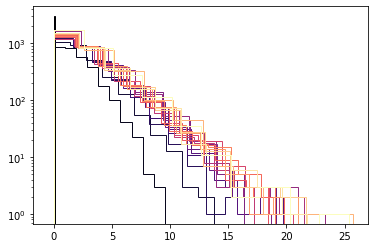

In [8]:
thin = 10

plt.figure()
colors = plt.cm.magma(np.linspace(0, 1, num=Ntime//thin))
for i in range(Ntime//thin):
    _ = plt.hist(positions[:, thin*i], histtype='step', color=colors[i])

plt.yscale('log')

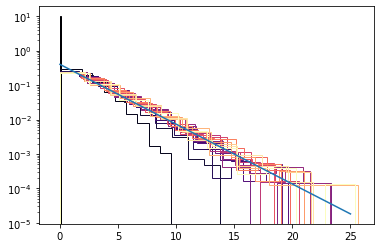

In [9]:
theor_lam = -2*mu/sigma**2

thin = 10

plt.figure()
colors = plt.cm.magma(np.linspace(0, 1, num=Ntime//thin))
for i in range(Ntime//thin):
    _ = plt.hist(positions[:, thin*i], histtype='step',
                 color=colors[i], density=True)

    
xx = np.linspace(0, 25, num=200)
plt.plot(xx, theor_lam*np.exp(-theor_lam*xx))
plt.yscale('log')

In [10]:
# upward scatter and downward displacement will eventually reach a steady state



In [11]:
# Benefits of Monte Carlo Simulation for error propagation

# consider trying to estimate that ratio r= a/b for two noisy measurement a +\- delta_a 
# and b +/- delta_b

# Gaussian error propagation would suggest
# (delta_r / r )^2 = (delta_a / a)^2 + (delta_b / b)^2

# let see how well that works

def sim_frac(a=10, delta_a=2, b=2, delta_b=0.1, Nsim=20000):
    
    r_gep = a/b
    delta_r_gep = r_gep*np.sqrt((delta_a/a)**2 + (delta_b/b)**2)
    
    sim_a = a + delta_a*rng.normal(size=Nsim)
    sim_b = b + delta_b*rng.normal(size=Nsim)
    
    sim_r = sim_a/sim_b
    
    return sim_r, r_gep, delta_r_gep




In [12]:
# Big note: see how we interpreted a +/- delta_a as
# if we repeated the same measurement many times, then
# meas_a = N(a, delta_a^2)
# which seems reasonable enough
# If you have other information about your experiment /
# data generating process, you should however consider that,
# e.g. it is a counting experiment --> Poisson

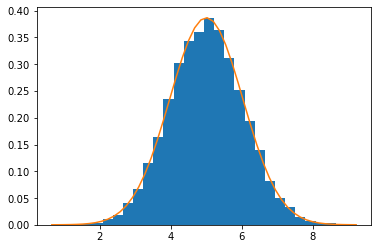

In [13]:
sim_r, r_gep, delta_r = sim_frac()

plt.figure()
_ = plt.hist(sim_r, bins=30, density=True)
rr = np.linspace(np.amin(sim_r), np.amax(sim_r))
plt.plot(rr, 1./np.sqrt(2*np.pi*delta_r**2)* \
         np.exp(-0.5*(rr-r_gep)**2/delta_r**2))

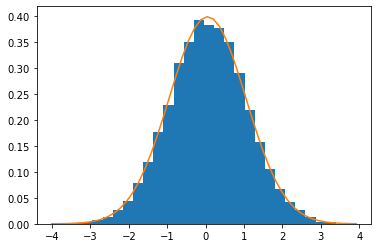

In [14]:
sim_r, r_gep, delta_r = sim_frac(a=0.1)

plt.figure()
_ = plt.hist(sim_r, bins=30, density=True)
rr = np.linspace(np.amin(sim_r), np.amax(sim_r))
plt.plot(rr, 1./np.sqrt(2*np.pi*delta_r**2)* \
         np.exp(-0.5*(rr-r_gep)**2/delta_r**2))

(5e-06, 0.1)

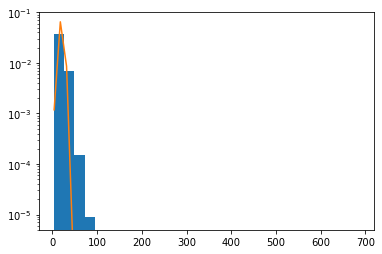

In [15]:
sim_r, r_gep, delta_r = sim_frac(b=0.5)

# b = 0.5 \pm 0.2

plt.figure()
_ = plt.hist(sim_r, bins=30, density=True)
rr = np.linspace(np.amin(sim_r), np.amax(sim_r))
plt.plot(rr, 1./np.sqrt(2*np.pi*delta_r**2)* \
         np.exp(-0.5*(rr-r_gep)**2/delta_r**2))
plt.yscale('log')
plt.ylim([5e-6, 0.1])

In [16]:
# gaussian error propagation stops working, 
# if the denominator becomes very uncertain 

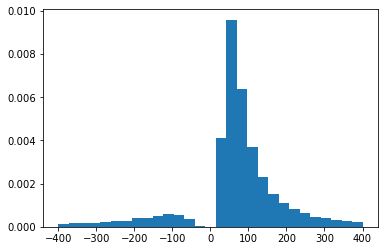

In [17]:
sim_r, r_gep, delta_r = sim_frac(b=0.1, Nsim=50000)

# b = 0.5 \pm 0.2


zoom = 400
plt.figure()
_ = plt.hist(sim_r, bins=np.linspace(-zoom, zoom, num=30),
             density=True)



# ew: 2 peaks --> bi-model distribution

(0.0001, 0.2)

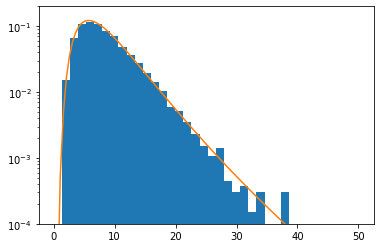

In [18]:
# the lognormal distribution
mu = 2
sigma = 0.5

x = mu + sigma*rng.normal(size=10000)

y =  np.exp(x)

plt.figure()
_ = plt.hist(y, bins=30, density=True)
yy = np.linspace(0.1, 50, num=100)
plt.plot(yy, 1./yy /np.sqrt(2*np.pi*sigma**2)* \
              np.exp(-0.5*(np.log(yy)-mu)**2 / sigma**2) )
plt.yscale('log')
plt.ylim([1e-4, 0.2])

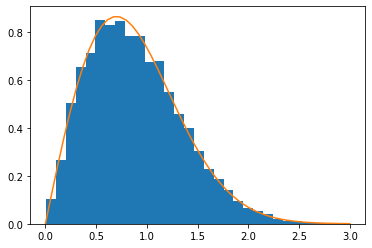

In [19]:
# transform method

u = rng.uniform(size=10000)

sigma = 0.7

x = np.sqrt(-2*sigma**2*np.log(1-u))

plt.figure()
_ = plt.hist(x, bins=30, density=True)
xx = np.linspace(0, 3)

plt.plot(xx, xx/sigma**2*np.exp(-0.5*xx**2/sigma**2))

In [20]:
# Homework: 

# -- apply the transform method to draw samples from the Pareto distribution p(x) ~ (x/xm)^alpha for x>xm, and = 0 else. 
# Choose reasonable  xm and alpha by trying out a few values and pick the one that makes the nicer plots.
# Compare the histogram of the sample with the analytical pdf.

# -- same as above, but for a Cauchy distribution. Careful here when making the histogram, there might be outliers. 
# You can truncate them while plot and zoom in around the median value. 

# While you are at it, check that you get a Cauchy random variable (beta=1, alpha=0) from the ratio x_1 / x_2 of to standard 
# normal random variates x_1,2 ~ N(mean=0, variance=1).

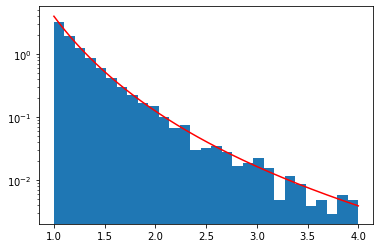

In [21]:
#The Pareto distribution
xm = 1
alpha = 4
N = 10000

rng = np.random.default_rng()
U = rng.uniform(0, 1, N)
pareto_samples = xm * (1 / (1 - U))**(1 / alpha) # Transform method

x_values = np.linspace(1, 4, 1000)
pdf_values = (alpha * xm**alpha) / x_values**(alpha + 1) # PDF the Pareto distribution

zoom = 4
plt.hist(pareto_samples, bins=np.linspace(1, zoom, num=30), density=True)
plt.plot(x_values, pdf_values, 'r-')
plt.yscale('log')
plt.show()

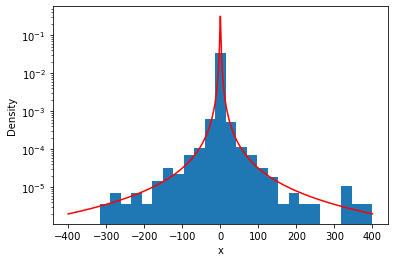

In [22]:
#The Cauchy distribution
x0 = 0  
gamma = 1  

Nsim = 10000

uniform_samples = rng.uniform(0, 1, Nsim)
cauchy_samples = x0 + gamma * np.tan(np.pi * (uniform_samples - 0.5))  # The transform method

zoom = 400
plt.hist(cauchy_samples, bins=np.linspace(-zoom, zoom, num=30), density=True)


x_vals = np.linspace(-400, 400, 10000)
cauchy_pdf = 1 / (np.pi *(1 + (x_vals) ** 2)) # The cauchy PDF
plt.plot(x_vals, cauchy_pdf, 'r-')

plt.xlabel("x")
plt.ylabel("Density")
plt.yscale("log") 
plt.show()


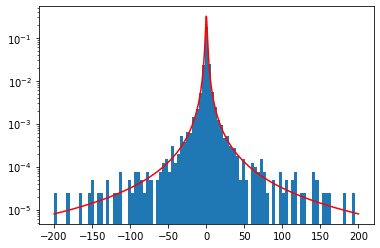

In [23]:
N = 10000

rng = np.random.default_rng()
x1 = rng.normal(0, 1, N)
x2 = rng.normal(0, 1, N)

cauchy_samples_ratio = x1 / x2

zoom = 200
plt.hist(cauchy_samples_ratio, bins=np.linspace(-zoom, zoom, num=100), density=True)

x_vals = np.linspace(-zoom, zoom, 10000)
cauchy_pdf = 1 / (np.pi * (1 + x_vals**2))


plt.plot(x_vals, cauchy_pdf, 'r-')
plt.yscale("log") 
plt.show()


In [24]:
# limb scattering

def emission(rng, taumax=10):
    
   
    
    return taumax, mu


def travel(rng, tau, mu):
    
   
    return taunew, muscatter


def sim_a_phot(rng, taumax):
    
  


IndentationError: expected an indented block (2816577289.py, line 18)

In [ ]:
xx = np.linspace(-1, 1, num=200)

X, Y = np.meshgrid(xx, xx)
rad = 1

mu = np.where( X**2+Y**2 < 1, np.sqrt(1-X**2-Y**2), -0.4/0.6)

fracI = 0.4 + 0.6*mu

plt.matshow(fracI, cmap='gray')
plt.colorbar()
plt.xticks([],[])
plt.yticks([],[])
plt.savefig('limb_darkening_endplot.pdf', bbox_inches='tight')

Not Homework.

Study the distributions of taus, from which the emitted photons originate.
--> what is the mean tau?
--> what shape does it distribution have?
--> why does it have that shape (based on your sims)?

Modify the simulator to record the amount of scatter events N_scatter before the photon leaves the star
--> run a few simulations for different tau_max, check the relation between N_scatter and tau_max?
--> explain the relation (physically)

Study the limit of tau<<1.
--> what happend with I(\mu) and N_scatter? 
--> Explain the new functional form of I(\mu) based on this knowledge. What is its physical meaning?
